### Download dataset from kaggle

In [1]:
! pip install kaggle -q

In [2]:
! mkdir ~/.kaggle

In [3]:
! cp /content/drive/MyDrive/Colab/kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle datasets download yasserh/housing-prices-dataset

Dataset URL: https://www.kaggle.com/datasets/yasserh/housing-prices-dataset
License(s): CC0-1.0
  0% 0.00/4.63k [00:00<?, ?B/s]
100% 4.63k/4.63k [00:00<00:00, 16.9MB/s]


In [6]:
! unzip housing-prices-dataset.zip

Archive:  housing-prices-dataset.zip
  inflating: Housing.csv             


In [7]:
! rm -rf housing-prices-dataset.zip

### Imports

In [164]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Read dataset and some details

In [165]:
df = pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [167]:
df.isna().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [168]:
df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [169]:
df.duplicated().sum()

np.int64(0)

In [170]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [171]:
df.nunique()

,0
price,219
area,284
bedrooms,6
bathrooms,4
stories,4
mainroad,2
guestroom,2
basement,2
hotwaterheating,2
airconditioning,2


In [172]:
for col in df.columns :
    if df[col].dtype == 'object' :
        print(f"{col} : {df[col].unique()}")

mainroad : ['yes' 'no']
guestroom : ['no' 'yes']
basement : ['no' 'yes']
hotwaterheating : ['no' 'yes']
airconditioning : ['yes' 'no']
prefarea : ['yes' 'no']
furnishingstatus : ['furnished' 'semi-furnished' 'unfurnished']


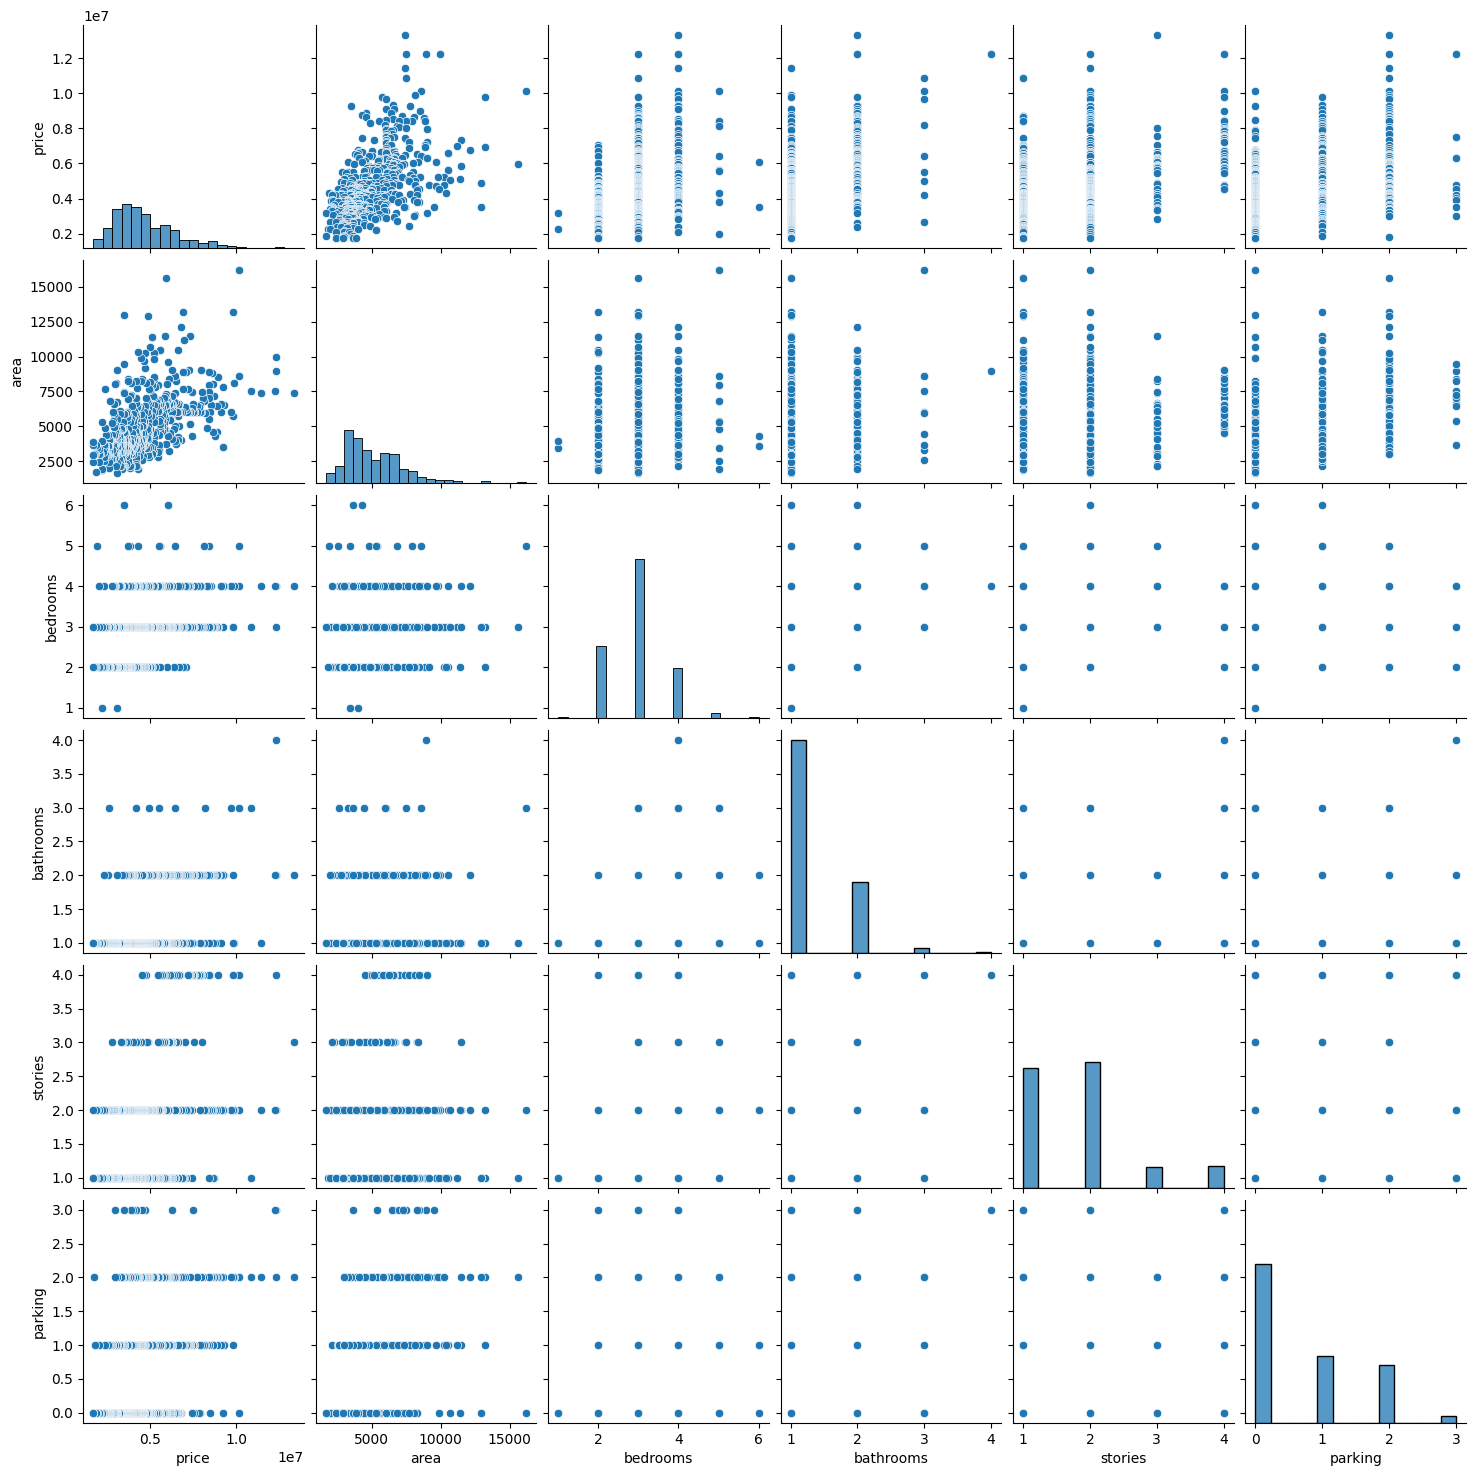

In [173]:
sns.pairplot(df)

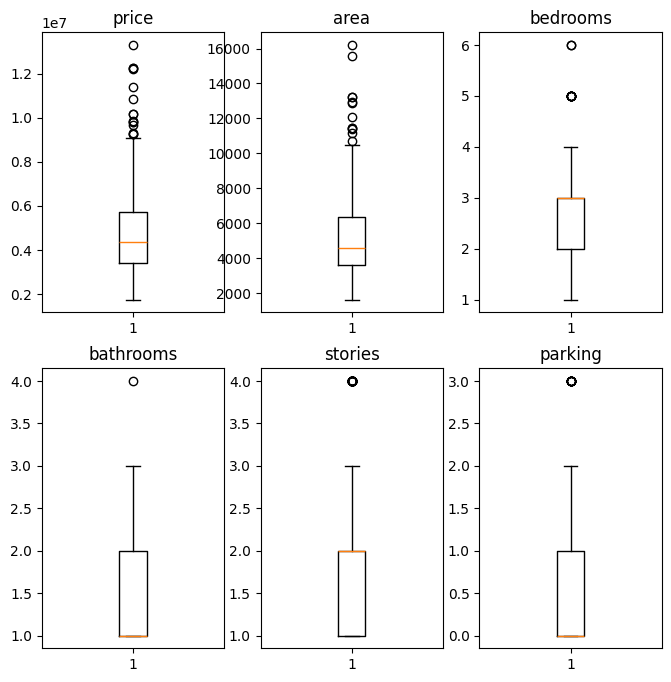

In [174]:
fig , axs = plt.subplots(2 , 3 , figsize = (8 , 8))
axs[0][0].boxplot(df['price'])
axs[0][0].set_title('price')
axs[0][1].boxplot(df['area'])
axs[0][1].set_title('area')
axs[0][2].boxplot(df['bedrooms'])
axs[0][2].set_title('bedrooms')
axs[1][0].boxplot(df['bathrooms'])
axs[1][0].set_title('bathrooms')
axs[1][1].boxplot(df['stories'])
axs[1][1].set_title('stories')
axs[1][2].boxplot(df['parking'])
axs[1][2].set_title('parking')
plt.show()

In [175]:
df = df[df['price'] < 10000000]
df = df[df['area'] <= 10000]
df.shape

(520, 13)

### Preprocessing


In [176]:
y = df['price']
df.drop(['price'] , axis = 1 , inplace = True)
y

,price
8,9870000
9,9800000
11,9681000
12,9310000
13,9240000
...,...
540,1820000
541,1767150
542,1750000
543,1750000


In [177]:
df

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
8,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished
11,6000,4,3,2,yes,yes,yes,yes,no,2,no,semi-furnished
12,6550,4,2,2,yes,no,no,no,yes,1,yes,semi-furnished
13,3500,4,2,2,yes,no,no,yes,no,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [178]:
df_numerical = df[df.columns[df.dtypes != 'object']]
df_numerical

,area,bedrooms,bathrooms,stories,parking
8,8100,4,1,2,2
9,5750,3,2,4,1
11,6000,4,3,2,2
12,6550,4,2,2,1
13,3500,4,2,2,2
...,...,...,...,...,...
540,3000,2,1,1,2
541,2400,3,1,1,0
542,3620,2,1,1,0
543,2910,3,1,1,0


In [179]:
df_binary = df[df.columns[(df.dtypes == 'object') & (df.nunique() == 2)]]
df_binary

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
8,yes,yes,yes,no,yes,yes
9,yes,yes,no,no,yes,yes
11,yes,yes,yes,yes,no,no
12,yes,no,no,no,yes,yes
13,yes,no,no,yes,no,no
...,...,...,...,...,...,...
540,yes,no,yes,no,no,no
541,no,no,no,no,no,no
542,yes,no,no,no,no,no
543,no,no,no,no,no,no


In [180]:
df_categorical = df[df.columns[(df.dtypes == 'object') & (df.nunique() > 2)]]
df_categorical

,furnishingstatus
8,furnished
9,unfurnished
11,semi-furnished
12,semi-furnished
13,furnished
...,...
540,unfurnished
541,semi-furnished
542,unfurnished
543,furnished


In [181]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
lbl_enc = LabelEncoder()
ohe_enc = OneHotEncoder()

In [182]:
df_bin = df_binary.apply(lbl_enc.fit_transform)
df_bin

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
8,1,1,1,0,1,1
9,1,1,0,0,1,1
11,1,1,1,1,0,0
12,1,0,0,0,1,1
13,1,0,0,1,0,0
...,...,...,...,...,...,...
540,1,0,1,0,0,0
541,0,0,0,0,0,0
542,1,0,0,0,0,0
543,0,0,0,0,0,0


In [183]:
df_cat = ohe_enc.fit_transform(df_categorical).toarray()
df_cat = pd.DataFrame(df_cat , columns = list(np.concatenate(ohe_enc.categories_)))
df_cat

,furnished,semi-furnished,unfurnished
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,1.0,0.0,0.0
...,...,...,...
515,0.0,0.0,1.0
516,0.0,1.0,0.0
517,0.0,0.0,1.0
518,1.0,0.0,0.0


In [184]:
from sklearn.preprocessing import MinMaxScaler
mms_scl = MinMaxScaler()

In [185]:
df_num = mms_scl.fit_transform(df_numerical)
df_num = pd.DataFrame(df_num , columns = df_numerical.columns)
df_num

,area,bedrooms,bathrooms,stories,parking
0,0.785627,0.6,0.0,0.333333,0.666667
1,0.499391,0.4,0.5,1.000000,0.333333
2,0.529842,0.6,1.0,0.333333,0.666667
3,0.596833,0.6,0.5,0.333333,0.333333
4,0.225335,0.6,0.5,0.333333,0.666667
...,...,...,...,...,...
515,0.164434,0.2,0.0,0.000000,0.666667
516,0.091352,0.4,0.0,0.000000,0.000000
517,0.239951,0.2,0.0,0.000000,0.000000
518,0.153471,0.4,0.0,0.000000,0.000000


In [186]:
data = pd.concat([df_num , df_bin , df_cat] , axis = 1)
data


,area,bedrooms,bathrooms,stories,parking,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnished,semi-furnished,unfurnished
0,0.785627,0.6,0.0,0.333333,0.666667,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0
1,0.499391,0.4,0.5,1.000000,0.333333,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0
2,0.529842,0.6,1.0,0.333333,0.666667,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0
3,0.596833,0.6,0.5,0.333333,0.333333,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0
4,0.225335,0.6,0.5,0.333333,0.666667,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN
541,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
542,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
543,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN


<Axes: >

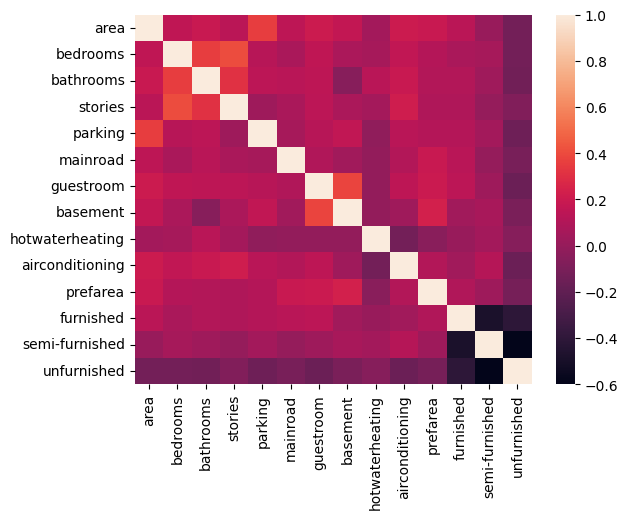

In [187]:
sns.heatmap(data.corr())

### Train test split

In [188]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(data , y , test_size = 0.2 , random_state = 17)

ValueError: Found input variables with inconsistent numbers of samples: [545, 520]

### Metrics imports

In [189]:
from sklearn import metrics

### Linear regression


In [190]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(x_train , y_train)

LinearRegression()

In [191]:
y_pred = lr_model.predict(x_train)
y_pred_test = lr_model.predict(x_test)

In [192]:
lr_model.score(x_train , y_train)

0.685072696345419

In [193]:
lr_model.score(x_test , y_test)

0.6349219014010157

In [194]:
metrics.mean_absolute_error(y_train , y_pred)

805550.0148469094

In [195]:
metrics.mean_absolute_error(y_test , y_pred_test)

715280.2671703895

### KNN regression


In [196]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors = 7)
knn_model.fit(x_train , y_train)

KNeighborsRegressor(n_neighbors=7)

In [197]:
y_pred = knn_model.predict(x_train)
y_pred_test = knn_model.predict(x_test)

In [198]:
knn_model.score(x_train , y_train)

0.6312431523090786

In [199]:
knn_model.score(x_test , y_test)

0.500188727594477

In [200]:
metrics.mean_absolute_error(y_train , y_pred)

826127.0642201835

In [201]:
metrics.mean_absolute_error(y_test , y_pred_test)

815683.3944954128

### SVM regression

In [202]:
from sklearn.svm import SVR
svm_model = SVR(kernel = 'rbf' , C = 1000000 , )
svm_model.fit(x_train , y_train)

SVR(C=1000000)

In [203]:
y_pred = svm_model.predict(x_train)
y_pred_test = svm_model.predict(x_test)

In [204]:
svm_model.score(x_train , y_train)

0.6749606665772774

In [205]:
svm_model.score(x_test , y_test)

0.6056189368683593

In [206]:
metrics.mean_absolute_error(y_train , y_pred)

695187.2695240709

In [207]:
metrics.mean_absolute_error(y_test , y_pred_test)

709281.7280336176

### Grid search

In [214]:
from sklearn.model_selection import GridSearchCV

In [215]:
params = {
    'C' : [1000000 , 2000000 , 3000000 , 4000000 , 5000000] ,
    'kernel' : ['linear' , 'poly' , 'rbf' , 'sigmoid'] ,
    'degree' : [1 , 2 , 3 , 4 , 5] ,
    'gamma' : ['scale' , 'auto'] ,
}
cv_model = GridSearchCV(SVR() , param_grid = params , scoring = 'r2' , verbose = 3)
cv_model.fit(x_train , y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
[CV 1/5] END C=1000000, degree=1, gamma=scale, kernel=linear;, score=0.595 total time=   0.0s
[CV 2/5] END C=1000000, degree=1, gamma=scale, kernel=linear;, score=0.605 total time=   0.0s
[CV 3/5] END C=1000000, degree=1, gamma=scale, kernel=linear;, score=0.655 total time=   0.0s
[CV 4/5] END C=1000000, degree=1, gamma=scale, kernel=linear;, score=0.656 total time=   0.1s
[CV 5/5] END C=1000000, degree=1, gamma=scale, kernel=linear;, score=0.671 total time=   0.0s
[CV 1/5] END C=1000000, degree=1, gamma=scale, kernel=poly;, score=0.592 total time=   0.0s
[CV 2/5] END C=1000000, degree=1, gamma=scale, kernel=poly;, score=0.579 total time=   0.0s
[CV 3/5] END C=1000000, degree=1, gamma=scale, kernel=poly;, score=0.644 total time=   0.0s
[CV 4/5] END C=1000000, degree=1, gamma=scale, kernel=poly;, score=0.644 total time=   0.0s
[CV 5/5] END C=1000000, degree=1, gamma=scale, kernel=poly;, score=0.654 total time=   0.0s
[CV 1/

GridSearchCV(estimator=SVR(),
             param_grid={'C': [1000000, 2000000, 3000000, 4000000, 5000000],
                         'degree': [1, 2, 3, 4, 5], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='r2', verbose=3)

In [216]:
cv_model.best_params_

{'C': 4000000, 'degree': 1, 'gamma': 'scale', 'kernel': 'poly'}

In [223]:
svm_model = SVR(kernel = 'poly' , C = 4000000 , gamma = 'scale' , degree = 1)
svm_model.fit(x_train , y_train)

SVR(C=4000000, degree=1, kernel='poly')

In [224]:
y_pred = svm_model.predict(x_train)
y_pred_test = svm_model.predict(x_test)

In [225]:
svm_model.score(x_train , y_train)

0.6618998168031962

In [226]:
svm_model.score(x_test , y_test)

0.6732428654343506

In [227]:
metrics.mean_absolute_error(y_train , y_pred)

783542.6959437231

In [228]:
metrics.mean_absolute_error(y_test , y_pred_test)

665293.7316142072